In [1]:
import pandas as pd 
df = pd.read_csv("C:/Users/alfredo/Documents/GitHub/RNP/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df = df.drop(['id'], axis=1)

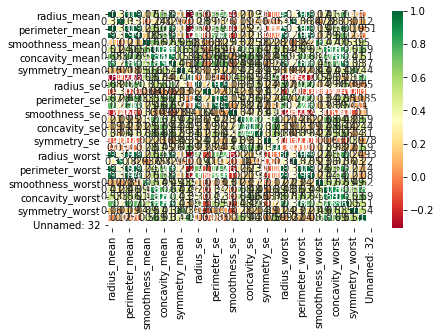

In [3]:
import seaborn as sns
fig = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df_train.corr()-->correlation matrix

In [4]:
cols = ['radius_worst',
       'texture_worst',
       'perimeter_worst',
       'area_worst',
       'smoothness_worst',
       'compactness_worst',
       'concavity_worst',
       'concave points_worst',
       'symmetry_worst',
       'fractal_dimension_worst',
       'perimeter_mean',
       'perimeter_se',
       'area_mean',
       'area_se',
       'concavity_mean',
       'concavity_se',
       'concave points_mean',
       'concave points_se']

df = df.drop(cols, axis=1)

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X_df = df
X_df = X_df.drop(['Unnamed: 32','diagnosis'], axis=1)
y_df = df['diagnosis']
y_df = [0 if x == 'B' else 1 for x in y_df]

In [6]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X_df, y_df, test_size = 0.3, random_state = 42)

y_tr = np.asarray(y_tr, dtype = np.int)
y_ts = np.asarray(y_ts, dtype = np.int)

y_tr = np.reshape(y_tr, [398,1])
y_ts = np.reshape(y_ts, [171,1])

print(x_ts.shape)
print(x_tr.shape)
print(y_ts.shape)
print(y_tr.shape)

(171, 12)
(398, 12)
(171, 1)
(398, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :", x_tr.shape)

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :", x_ts.shape)

Training Data : (398, 12)
Testing Data : (171, 12)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                260       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 525
Trainable params: 525
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 0s 24ms/step - loss: 0.6688 - accuracy: 0.6256 - val_loss: 0.6624 - val_accuracy: 0.6316
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6658 - accuracy: 0.6256 - val_loss:

Epoch 52/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6256 - val_loss: 0.6550 - val_accuracy: 0.6316
Epoch 53/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.6256 - val_loss: 0.6541 - val_accuracy: 0.6316
Epoch 54/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.6256 - val_loss: 0.6539 - val_accuracy: 0.6316
Epoch 55/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6256 - val_loss: 0.6540 - val_accuracy: 0.6316
Epoch 56/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.6256 - val_loss: 0.6538 - val_accuracy: 0.6316
Epoch 57/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.6256 - val_loss: 0.6537 - val_accuracy: 0.6316
Epoch 58/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.6256 - val_loss: 0.6537 - val_accuracy: 0.6316

13/13 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.6256 - val_loss: 0.6442 - val_accuracy: 0.6316
Epoch 110/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.6256 - val_loss: 0.6439 - val_accuracy: 0.6316
Epoch 111/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6256 - val_loss: 0.6451 - val_accuracy: 0.6316
Epoch 112/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.6256 - val_loss: 0.6434 - val_accuracy: 0.6316
Epoch 113/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.6256 - val_loss: 0.6431 - val_accuracy: 0.6316
Epoch 114/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.6256 - val_loss: 0.6433 - val_accuracy: 0.6316
Epoch 115/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6438 - accuracy: 0.6231 - val_loss: 0.6427 - val_accuracy: 0.6316
Epoch 1

Epoch 166/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.6281 - val_loss: 0.6170 - val_accuracy: 0.6316
Epoch 167/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 0.6508 - val_loss: 0.6162 - val_accuracy: 0.6316
Epoch 168/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.6457 - val_loss: 0.6165 - val_accuracy: 0.6316
Epoch 169/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6395 - accuracy: 0.6382 - val_loss: 0.6134 - val_accuracy: 0.6316
Epoch 170/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6297 - accuracy: 0.6382 - val_loss: 0.6126 - val_accuracy: 0.6316
Epoch 171/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6411 - accuracy: 0.6307 - val_loss: 0.6116 - val_accuracy: 0.6316
Epoch 172/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.6307 - val_loss: 0.6117 - val_accuracy:

Epoch 223/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5765 - accuracy: 0.6985 - val_loss: 0.5322 - val_accuracy: 0.8480
Epoch 224/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5724 - accuracy: 0.6985 - val_loss: 0.5261 - val_accuracy: 0.8304
Epoch 225/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5861 - accuracy: 0.6709 - val_loss: 0.5267 - val_accuracy: 0.8480
Epoch 226/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.6960 - val_loss: 0.5272 - val_accuracy: 0.8655
Epoch 227/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.6960 - val_loss: 0.5190 - val_accuracy: 0.8421
Epoch 228/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5769 - accuracy: 0.6734 - val_loss: 0.5187 - val_accuracy: 0.8480
Epoch 229/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.7010 - val_loss: 0.5127 - val_accuracy:

Epoch 280/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.7513 - val_loss: 0.4126 - val_accuracy: 0.9415
Epoch 281/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7513 - val_loss: 0.4031 - val_accuracy: 0.9532
Epoch 282/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.8216 - val_loss: 0.4107 - val_accuracy: 0.9240
Epoch 283/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7538 - val_loss: 0.3985 - val_accuracy: 0.9591
Epoch 284/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7487 - val_loss: 0.3928 - val_accuracy: 0.9474
Epoch 285/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4978 - accuracy: 0.7487 - val_loss: 0.4141 - val_accuracy: 0.9240
Epoch 286/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4901 - accuracy: 0.7688 - val_loss: 0.4040 - val_accuracy:

Epoch 337/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8216 - val_loss: 0.3210 - val_accuracy: 0.9298
Epoch 338/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4312 - accuracy: 0.8040 - val_loss: 0.3198 - val_accuracy: 0.9298
Epoch 339/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4153 - accuracy: 0.8291 - val_loss: 0.3171 - val_accuracy: 0.9298
Epoch 340/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4114 - accuracy: 0.7965 - val_loss: 0.3197 - val_accuracy: 0.9298
Epoch 341/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8266 - val_loss: 0.3191 - val_accuracy: 0.9240
Epoch 342/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8241 - val_loss: 0.3135 - val_accuracy: 0.9298
Epoch 343/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8291 - val_loss: 0.3126 - val_accuracy:

Epoch 394/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3863 - accuracy: 0.8015 - val_loss: 0.2706 - val_accuracy: 0.9240
Epoch 395/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3564 - accuracy: 0.8317 - val_loss: 0.2851 - val_accuracy: 0.9181
Epoch 396/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3482 - accuracy: 0.8342 - val_loss: 0.2830 - val_accuracy: 0.9181
Epoch 397/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3132 - accuracy: 0.8543 - val_loss: 0.2811 - val_accuracy: 0.9181
Epoch 398/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3242 - accuracy: 0.8593 - val_loss: 0.2996 - val_accuracy: 0.9006
Epoch 399/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3355 - accuracy: 0.8618 - val_loss: 0.2865 - val_accuracy: 0.9181
Epoch 400/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3418 - accuracy: 0.8593 - val_loss: 0.2753 - val_accuracy:

13/13 [==============================] - 0s 3ms/step - loss: 0.3641 - accuracy: 0.8342 - val_loss: 0.2985 - val_accuracy: 0.8830
Epoch 451/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3506 - accuracy: 0.8543 - val_loss: 0.2656 - val_accuracy: 0.9181
Epoch 452/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3158 - accuracy: 0.8693 - val_loss: 0.2740 - val_accuracy: 0.9123
Epoch 453/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8693 - val_loss: 0.2785 - val_accuracy: 0.9064
Epoch 454/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3016 - accuracy: 0.8744 - val_loss: 0.2696 - val_accuracy: 0.9181
Epoch 455/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8719 - val_loss: 0.2899 - val_accuracy: 0.8889
Epoch 456/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3081 - accuracy: 0.8618 - val_loss: 0.2810 - val_accuracy: 0.8947
Epoch 4

Epoch 507/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8593 - val_loss: 0.2583 - val_accuracy: 0.9064
Epoch 508/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.8618 - val_loss: 0.2798 - val_accuracy: 0.8830
Epoch 509/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.8693 - val_loss: 0.2773 - val_accuracy: 0.8889
Epoch 510/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2951 - accuracy: 0.8618 - val_loss: 0.2759 - val_accuracy: 0.8889
Epoch 511/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.8769 - val_loss: 0.2921 - val_accuracy: 0.8655
Epoch 512/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3226 - accuracy: 0.8518 - val_loss: 0.2805 - val_accuracy: 0.8830
Epoch 513/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.8769 - val_loss: 0.2714 - val_accuracy:

Epoch 564/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8518 - val_loss: 0.3050 - val_accuracy: 0.8596
Epoch 565/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.8593 - val_loss: 0.2871 - val_accuracy: 0.8655
Epoch 566/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2908 - accuracy: 0.8869 - val_loss: 0.2848 - val_accuracy: 0.8713
Epoch 567/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2621 - accuracy: 0.8945 - val_loss: 0.2783 - val_accuracy: 0.8713
Epoch 568/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.8568 - val_loss: 0.2929 - val_accuracy: 0.8655
Epoch 569/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.8593 - val_loss: 0.2941 - val_accuracy: 0.8655
Epoch 570/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2796 - accuracy: 0.8869 - val_loss: 0.2838 - val_accuracy:

13/13 [==============================] - 0s 3ms/step - loss: 0.2890 - accuracy: 0.8568 - val_loss: 0.2876 - val_accuracy: 0.8655
Epoch 621/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2461 - accuracy: 0.8894 - val_loss: 0.3052 - val_accuracy: 0.8596
Epoch 622/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2799 - accuracy: 0.8794 - val_loss: 0.3002 - val_accuracy: 0.8596
Epoch 623/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.8668 - val_loss: 0.2894 - val_accuracy: 0.8596
Epoch 624/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.8844 - val_loss: 0.2833 - val_accuracy: 0.8655
Epoch 625/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2808 - accuracy: 0.8719 - val_loss: 0.2821 - val_accuracy: 0.8713
Epoch 626/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.9020 - val_loss: 0.3169 - val_accuracy: 0.8538
Epoch 6

Epoch 677/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2637 - accuracy: 0.9095 - val_loss: 0.3111 - val_accuracy: 0.8538
Epoch 678/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2576 - accuracy: 0.8970 - val_loss: 0.2898 - val_accuracy: 0.8596
Epoch 679/1000
13/13 [==============================] - ETA: 0s - loss: 0.3511 - accuracy: 0.84 - 0s 3ms/step - loss: 0.2534 - accuracy: 0.8970 - val_loss: 0.3111 - val_accuracy: 0.8538
Epoch 680/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2567 - accuracy: 0.8945 - val_loss: 0.3024 - val_accuracy: 0.8596
Epoch 681/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2709 - accuracy: 0.8819 - val_loss: 0.2954 - val_accuracy: 0.8596
Epoch 682/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8568 - val_loss: 0.2989 - val_accuracy: 0.8596
Epoch 683/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2426 - accuracy:

13/13 [==============================] - 0s 4ms/step - loss: 0.2576 - accuracy: 0.8869 - val_loss: 0.3106 - val_accuracy: 0.8538
Epoch 734/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2467 - accuracy: 0.8844 - val_loss: 0.2923 - val_accuracy: 0.8596
Epoch 735/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.8945 - val_loss: 0.2965 - val_accuracy: 0.8596
Epoch 736/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2742 - accuracy: 0.8643 - val_loss: 0.2849 - val_accuracy: 0.8596
Epoch 737/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2633 - accuracy: 0.8995 - val_loss: 0.3041 - val_accuracy: 0.8538
Epoch 738/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2223 - accuracy: 0.8920 - val_loss: 0.3096 - val_accuracy: 0.8538
Epoch 739/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.8869 - val_loss: 0.2924 - val_accuracy: 0.8596
Epoch 7

Epoch 790/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2666 - accuracy: 0.8894 - val_loss: 0.2967 - val_accuracy: 0.8596
Epoch 791/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2666 - accuracy: 0.8794 - val_loss: 0.2967 - val_accuracy: 0.8596
Epoch 792/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2530 - accuracy: 0.9020 - val_loss: 0.2974 - val_accuracy: 0.8596
Epoch 793/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2681 - accuracy: 0.8769 - val_loss: 0.3129 - val_accuracy: 0.8538
Epoch 794/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2410 - accuracy: 0.8844 - val_loss: 0.3134 - val_accuracy: 0.8538
Epoch 795/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2451 - accuracy: 0.9070 - val_loss: 0.3079 - val_accuracy: 0.8538
Epoch 796/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.8744 - val_loss: 0.3186 - val_accuracy:

13/13 [==============================] - 0s 3ms/step - loss: 0.2387 - accuracy: 0.9020 - val_loss: 0.3002 - val_accuracy: 0.8538
Epoch 847/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.9095 - val_loss: 0.3062 - val_accuracy: 0.8538
Epoch 848/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2439 - accuracy: 0.8995 - val_loss: 0.3098 - val_accuracy: 0.8538
Epoch 849/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2413 - accuracy: 0.8894 - val_loss: 0.3256 - val_accuracy: 0.8363
Epoch 850/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2548 - accuracy: 0.8894 - val_loss: 0.3136 - val_accuracy: 0.8538
Epoch 851/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.8894 - val_loss: 0.3109 - val_accuracy: 0.8538
Epoch 852/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2459 - accuracy: 0.8869 - val_loss: 0.3133 - val_accuracy: 0.8538
Epoch 8

Epoch 903/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.8970 - val_loss: 0.3032 - val_accuracy: 0.8538
Epoch 904/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9121 - val_loss: 0.3270 - val_accuracy: 0.8363
Epoch 905/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2252 - accuracy: 0.9070 - val_loss: 0.3423 - val_accuracy: 0.8246
Epoch 906/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.9020 - val_loss: 0.3398 - val_accuracy: 0.8246
Epoch 907/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2626 - accuracy: 0.8844 - val_loss: 0.3387 - val_accuracy: 0.8246
Epoch 908/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9095 - val_loss: 0.3099 - val_accuracy: 0.8538
Epoch 909/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.9196 - val_loss: 0.3175 - val_accuracy:

13/13 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.8945 - val_loss: 0.3333 - val_accuracy: 0.8246
Epoch 960/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2389 - accuracy: 0.9045 - val_loss: 0.3252 - val_accuracy: 0.8363
Epoch 961/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2440 - accuracy: 0.8945 - val_loss: 0.3436 - val_accuracy: 0.8187
Epoch 962/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.9095 - val_loss: 0.3443 - val_accuracy: 0.8187
Epoch 963/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9121 - val_loss: 0.3403 - val_accuracy: 0.8246
Epoch 964/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.9246 - val_loss: 0.3389 - val_accuracy: 0.8246
Epoch 965/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.8995 - val_loss: 0.3634 - val_accuracy: 0.8070
Epoch 9

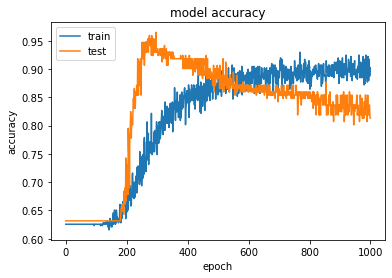

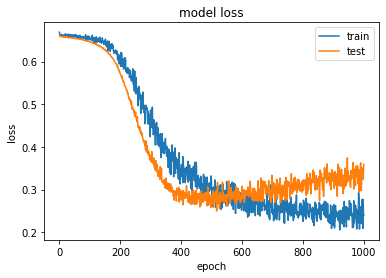

Maximum Loss : 0.6688

Minimum Loss : 0.2054

Loss difference : 0.4635


In [9]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout

# Hyperparameters
training_epochs = 1000 # Total number of training epochs
learning_rate = 0.01 # The learning rate
momentum = 0.9

# create a model
def create_model():
    model = tf.keras.Sequential()
    # Hidden layer 1
    model.add(tf.keras.layers.Dense(20, input_dim=12,activation='sigmoid'))
    model.add(Dropout(0.4))
    # Hidden layer 2
    model.add(tf.keras.layers.Dense(12, input_dim=20,activation='sigmoid'))
#    model.add(Dropout(0.4))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate, momentum),
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

results = model.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    validation_data = (x_ts, y_ts),
    verbose = 1
)



print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))